# Lab Day_3


### Introduction

The notebook contains the lab exercise for day three. In the first section we will go through data pre-processing, followed by training a simple neural network based on the introduction you had in the lecture videos. 

### Problem Statement and Data
#### Scenario:
   - A medical division collected some data from its patients
   - All the target patients contracted the same disease
   - The therapy consists in five different and exclusive cures
       * Each cure depends on the patients' conditions
       
#### Goal 
- Define an automatic procedure for the cure assignment
- Multiclass classification with the maximum possible accuracy

#### Data : 
The dataset `Drugs.csv` contains 200 observations and 9 features(variables)

| Attribute       | Description                                               |
|-----------------|-----------------------------------------------------------|
| Instance_number | Incremental tuple ID (INTEGER)                            |
| ID              | Patient’s ID (INTEGER)                                    |
| Age             | Patient’s age (INTEGER)                                   |
| Sex             | Patient’s gender: F or M                                  |
| BP              | Blood Pressure: HIGH, NORMAL or LOW                       |
| Cholesterol     | Concentration of cholesterol in the blood: NORMAL or HIGH |
| Na              | Concentration of sodium in the blood (REAL)               |
| K               | Concentration of potassium in the blood (REAL)            |
| Drug            | The chosen cure: drugY, drugC, drugX, drugA, drugB        |


### Issues:
- Sex, BP and Cholestrol are categorical data
- Na and K have missing values
- The dataset is rather small


In [27]:
# load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import keras 

#set numpy random seed
np.random.seed(1000)

In [ ]:
# import the data (drugs.csv) to colab
# download the data from the Teams lecture and matrials folder

from google.colab import files
files.upload()



In [29]:
data = pd.read_csv('drug.csv', na_values='?')

In [30]:
# check the data
data

,Instance_number,ID,Age,Sex,BP,Cholesterol,Na,K,Drug
0,0,1,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,1,2,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,2,3,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,3,4,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,4,5,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...,...,...
195,195,196,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,196,197,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,197,198,52,M,NORMAL,HIGH,0.549945,NaN,drugX
198,198,199,23,M,NORMAL,NORMAL,0.784520,NaN,drugX


In [31]:
# replace NaN values by the mean values for Na and K
# calculate the means
# your code here
########################



########################

# replace NaN by the mean values using pandas fillna function
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna
########################


#######################



In [32]:
# print data after filling NaN
data

,Instance_number,ID,Age,Sex,BP,Cholesterol,Na,K,Drug
0,0,1,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,1,2,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,2,3,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,3,4,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,4,5,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...,...,...
195,195,196,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,196,197,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,197,198,52,M,NORMAL,HIGH,0.549945,NaN,drugX
198,198,199,23,M,NORMAL,NORMAL,0.784520,NaN,drugX


In [33]:
# define the dependent and explantory variables
X_all = data.iloc[:,2:8]
Y_all = data.iloc[:,8]

In [34]:

from pandas.api.types import CategoricalDtype

# encode the catagorical variables
# there are a number of ways to encode categorical features to numeric
# here we will use pandas 'One Hot Encoding'
# The dummy variables will be named after the name of the category, by adding 'Sex_'   
# to the beginning we know that these dummy variables indicate the Sex:
X_all['Sex'] = X_all['Sex'].astype(CategoricalDtype(categories=['F', 'M'],ordered=False))
# We can now obtain the dummy variables.
Sex_dummies = pd.get_dummies(X_all['Sex'], prefix='Sex')

# we do the same for BP
X_all['BP'] = X_all['BP'].astype(CategoricalDtype(categories=['High', 'LOW','NORMAL'],ordered=False))
BP_dummies = pd.get_dummies(X_all['BP'], prefix='BP')

# we do the same for Cholesterol (now your turn)
#============================================




#============================================

# get_dummies()function creates a new data frame. 
# We now have to attach this data frame to the main data frame:

X_all = pd.concat([X_all,Sex_dummies,BP_dummies,Cholesterol_dummies ], axis=1)
# since the dummy variables are in our main data frame, we can remove the original columns:
X_all.drop(['Sex', 'BP', 'Cholesterol'],axis=1, inplace=True)

Y_all = pd.DataFrame(Y_all)
Y_all['Drug'] = Y_all['Drug'].astype(CategoricalDtype(categories=['drugY', 'drugC', 'drugX', 'drugA', 'drugB'],ordered=False))
Drug_dummies = pd.get_dummies(Y_all)
Y_all = Drug_dummies.values

#second approach 
#from sklearn.preprocessing import OneHotEncoder
#reshape target variable to 2d arrays
#============================================
#Y_all = Y_all.values.reshape((len(Y_all),1))
#onehot_encoder = OneHotEncoder()
#onehot_encoder.fit(Y_all)
#Y_all = onehot_encoder.transform(Y_all)
#Y_all = Y_all.todense()
#============================================

In [35]:
# check the shape of the data
print("Y_all={}".format(Y_all.shape))
print("X_all={}".format(X_all.shape))

Y_all=(200, 5)
X_all=(200, 10)


In [36]:
# print some of the target variables and see how its encoded
Y_all[0:5]

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [37]:
# print some of the independent variables too
# notice the X_all is still pandas dataframe object
X_all.head(5)

,Age,Na,K,Sex_F,Sex_M,BP_High,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0.792535,0.031258,1,0,0,0,0,1,0
1,47,0.739309,0.056468,0,1,0,1,0,1,0
2,47,0.697269,0.068944,0,1,0,1,0,1,0
3,28,0.563682,0.072289,1,0,0,0,1,1,0
4,61,0.559294,0.030998,1,0,0,1,0,1,0


In [38]:
#Normalization of Age, Na and K
X_all_norm = X_all
#Age
X_all_norm ['Age'] = (X_all_norm ['Age']-X_all_norm ['Age'].mean())/X_all_norm ['Age'].std()
#Na
X_all_norm ['Na'] = (X_all_norm ['Na']-X_all_norm ['Na'].mean())/X_all_norm ['Na'].std()
# K [YOUR TURN]
#============================


#============================

In [39]:
X_all_norm

,Age,Na,K,Sex_F,Sex_M,BP_High,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,-1.288358,0.786509,0.031258,1,0,0,0,0,1,0
1,0.162291,0.345428,0.056468,0,1,0,1,0,1,0
2,0.162291,-0.002956,0.068944,0,1,0,1,0,1,0
3,-0.986139,-1.109986,0.072289,1,0,0,0,1,1,0
4,1.008504,-1.146349,0.030998,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,0.706285,1.252560,0.073380,1,0,0,1,0,1,0
196,-1.711464,0.376189,0.061886,0,1,0,1,0,1,0
197,0.464510,-1.223824,NaN,0,1,0,0,1,1,0
198,-1.288358,0.720089,NaN,0,1,0,0,1,0,1


In [40]:
# change dataframe to numpy arrays
X_all = X_all_norm.values

In [41]:
# split the data to training and test sets [Your turn] and name them (train_data,test_data,train_target,test_target)
from sklearn.model_selection import train_test_split
#===================================




#===================================


In [42]:
#train_data = X_all[:150]
#test_data = X_all[150:]
#train_target = Y_all[:150]
#test_target = Y_all[150:]

In [43]:
test_data[0:5]

array([[ 0.94805982, -0.43850034,  0.78870765,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ],
       [ 1.73382824,  1.13647813, -0.38458216,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ],
       [ 0.52495375, -0.4433725 , -0.25327597,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  0.        ],
       [-0.98613937, -0.34781421, -0.0052658 ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ],
       [-1.59057662,  1.57797665, -1.49361091,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ]])

In [44]:
# print the shapes of the splited data
print("train_data={}".format(train_data.shape))
print("test_data={}".format(test_data.shape))
print("train_target={}".format(train_target.shape))
print("test_target={}".format(test_target.shape))

train_data=(150, 10)
test_data=(50, 10)
train_target=(150, 5)
test_target=(50, 5)


# Model Data Using Neural Network

In [45]:
# Import `models`  and ayers` from `keras`
from keras import models
from keras import layers

# define a simple function that returns a compiled model
def build_model():
  # Initialize the constructor
  model = models.Sequential()
  # Add an input layer 
  model.add(layers.Dense(32, activation='relu', input_shape=(train_data.shape[1],)))
  # Add one hidden layer
  model.add(layers.Dense(32, activation='relu'))
  # Add an output layer  
  model.add(layers.Dense(train_target.shape[1], activation='softmax'))
  # compile model
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model


In [46]:
# fit the neural network model using three fold cross validation
k = 3
num_val_samples = len(train_data) // k
num_epochs = 200
val_loss = []
all_loss = []
val_metric = []
all_metric = []
for i in range(k):
    print('processing fold #', i+1)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i + 1) * num_val_samples:]],
        axis=0)
    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=10, verbose=0)
    # Evaluate the model on the validation data
    val_loss_history = history.history['val_loss'] 
    loss_history = history.history['loss']
    val_metric_history = history.history['val_accuracy']
    metric_history = history.history['accuracy']
    val_loss.append(val_loss_history)
    all_loss.append(loss_history)
    val_metric.append(val_metric_history)
    all_metric.append(metric_history)

processing fold # 1
processing fold # 2
processing fold # 3


In [47]:
# check which metrics are included in the history object
history_dict = history.history
history_dict.keys()


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [48]:
# calculate the avarae of accuracy across the three folds
average_val_loss_history = [
    np.mean([x[i] for x in val_loss]) for i in range(num_epochs)]
average_loss_history = [
    np.mean([x[i] for x in all_loss]) for i in range(num_epochs)]
average_val_metric_history = [
    np.mean([x[i] for x in val_metric]) for i in range(num_epochs)]
average_metric_history = [
    np.mean([x[i] for x in all_metric]) for i in range(num_epochs)]

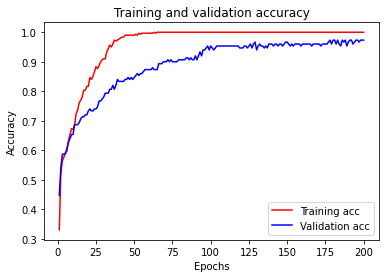

In [49]:
plt.plot(range(1, len(average_metric_history) + 1), average_metric_history,'r', label='Training acc')
plt.plot(range(1, len(average_val_metric_history) + 1), average_val_metric_history,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

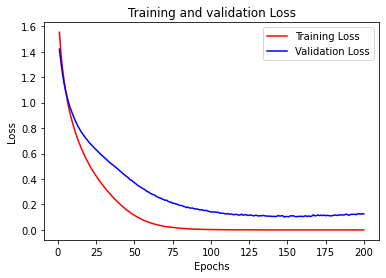

In [50]:
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,'r', label='Training Loss')
plt.plot(range(1, len(average_val_loss_history) + 1), average_val_loss_history,'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model = build_model()
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)
model.fit(train_data, train_target,epochs=120, batch_size = 10, verbose=0)
y_pred = model.predict(test_data)

print("Evaluation on test data")
results = model.evaluate(test_data,test_target, batch_size=1)
print("test loss, test acc:", results)

Evaluation on test data
50/50 [==============================] - 0s 857us/step
test loss, test acc: [0.545521657357389, 0.9200000166893005]


In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 165       
Total params: 1,573
Trainable params: 1,573
Non-trainable params: 0
_________________________________________________________________
None


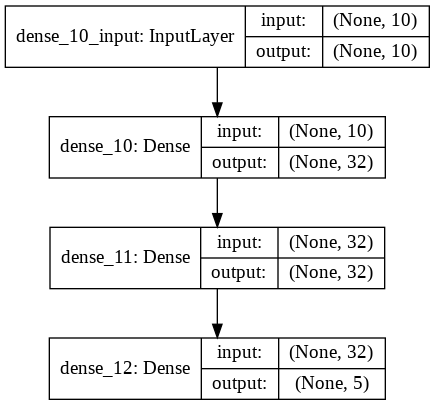

In [ ]:
from IPython.display import Image
Image('model.png')

There are a number of hyperparmeters you can change to make your model even better. In the folowwing sections try changing the hyperparameters and see how the accuracy of your model changes. 


In [ ]:
# You used 1 hidden layers. Try to use 2 or 3 hidden layers
#Your solution here



In [ ]:
#try using the tanh activation function, Instead of relu and see what the result is
# Your solution here

In [ ]:
#try out experimenting with the learning rate `lr` 
# refere to https://keras.io/api/optimizers/rmsprop/
from keras.optimizers import RMSprop

# Your solution here